In [1]:
# for colab environment
# !pip install tensorflow-gpu==2

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocess

In [3]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# check shape of dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Check feature data

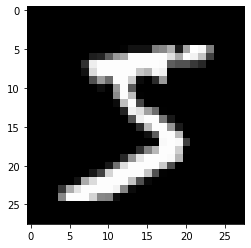

In [5]:
# check real image
img = x_train[0]
plt.imshow(img, 'gray')
plt.show()

In [6]:
# trim dataset
## gray scale image -> add a 1-dim col
## rgb scale image -> add a 3-dim col
x_train = x_train[..., tf.newaxis]
x_train.shape

(60000, 28, 28, 1)

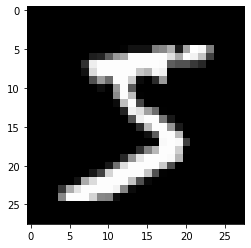

In [7]:
# check real image
img = x_train[0, :, :, 0]   # need to deleted added col to plot a image.
plt.imshow(img, 'gray')
plt.show()

## Check label data

In [8]:
y_train[0]

5

In [9]:
# change to one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train)

/Users/jeehyunpark/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


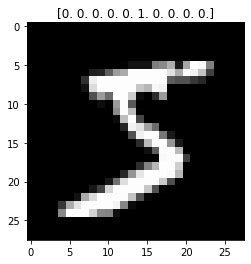

In [10]:
img = x_train[0, :, :, 0]
label_one_hot = y_train[0]

plt.title(label_one_hot)
plt.imshow(img, 'gray')
plt.show()

In [11]:
img = img[tf.newaxis, ..., tf.newaxis] # [batch_num, h, w, channel_num]
img.shape

(1, 28, 28, 1)

# Layers explain

## Feature extraction part (Conv)

### Conv2D

In [12]:
conv_layer = tf.keras.layers.Conv2D(filters=3,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='SAME')

In [13]:
img = tf.cast(img, dtype=tf.float32)
img.dtype

tf.float32

In [14]:
conv_output = conv_layer(img)

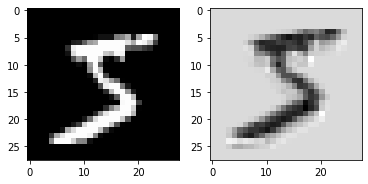

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(img[0, :, :, 0], 'gray')
plt.subplot(1, 2, 2)
plt.imshow(conv_output[0, :, :, 0], 'gray')
plt.show()

In [16]:
weight, bias = conv_layer.get_weights()

In [17]:
weight.shape, bias.shape

((3, 3, 1, 3), (3,))

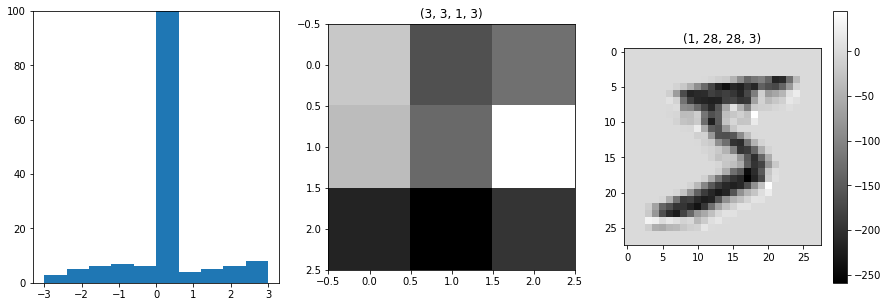

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(conv_output.numpy().ravel(), range=[-3, 3])
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
plt.title(weight.shape)
plt.imshow(weight[:, :, 0, 0], 'gray')

plt.subplot(1, 3, 3)
plt.title(conv_output.shape)
plt.imshow(conv_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

### Activation

In [19]:
acti_layer = tf.keras.layers.ReLU()

In [20]:
acti_output = acti_layer(conv_output)
acti_output.shape

TensorShape([1, 28, 28, 3])

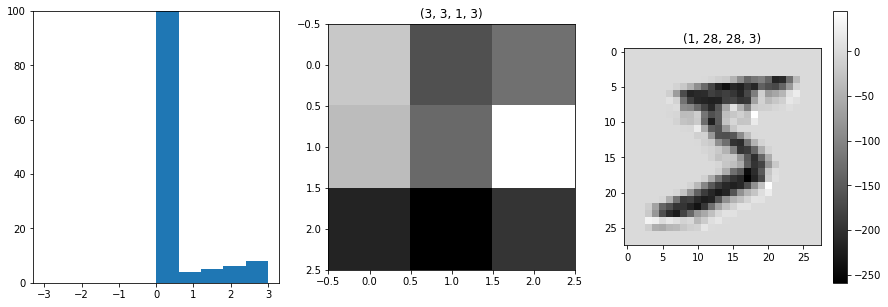

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(acti_output.numpy().ravel(), range=[-3, 3])
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
plt.title(weight.shape)
plt.imshow(weight[:, :, 0, 0], 'gray')

plt.subplot(1, 3, 3)
plt.title(conv_output.shape)
plt.imshow(conv_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

### Pooling

In [22]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [23]:
pool_output = pool_layer(acti_output)
pool_output.shape # [batch_num, h, w, channel_num]

TensorShape([1, 14, 14, 3])

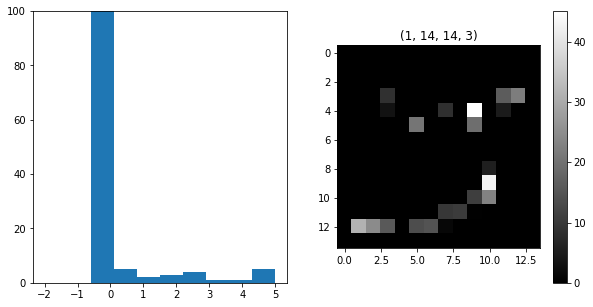

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(pool_output.numpy().ravel(), range=[-2, 5])
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

## Classification part (Fully Connected Net)

### Flatten

In [25]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)
flatten_output.shape # [batch_num, h*w*channel_num]

TensorShape([1, 588])

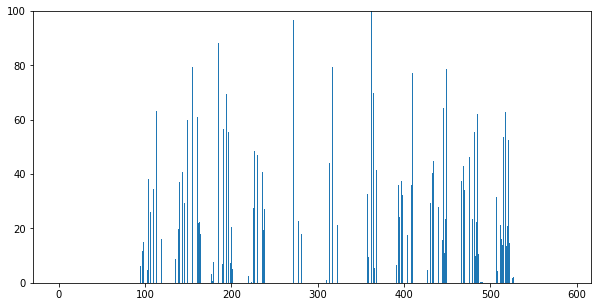

In [33]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(14*14*3), flatten_output.numpy().ravel())
plt.ylim(0, 100)
plt.show()

### Dense

In [34]:
dense_layer_1 = tf.keras.layers.Dense(units=32, activation='relu')
dense_output = dense_layer_1(flatten_output)
dense_output.shape # [batch_num, unit_num]

TensorShape([1, 32])

In [35]:
dense_layer_2 = tf.keras.layers.Dense(units=10, activation='relu')
dense_output = dense_layer_2(flatten_output)
dense_output.shape # [batch_num, unit_num]

TensorShape([1, 10])

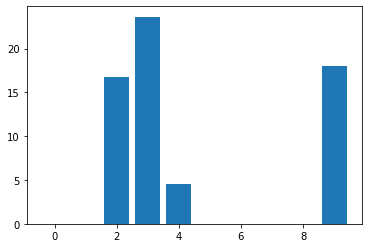

In [36]:
plt.bar(np.arange(10), dense_output.numpy().ravel())
plt.show()

### Softmax

In [37]:
softmax_layer = tf.keras.layers.Softmax()
output = softmax_layer(dense_output)
output.shape

TensorShape([1, 10])

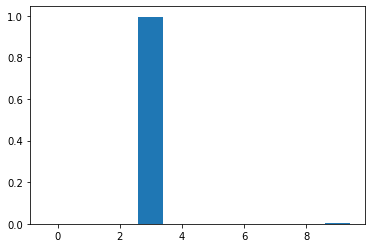

In [38]:
plt.bar(np.arange(10), output.numpy().ravel())
plt.show()

In [40]:
np.argmax(output)

3

# Build model

In [41]:
from tensorflow.keras import layers

In [42]:
input_shape = (28, 28, 1)
num_classes = 10

In [43]:
inputs = layers.Input(shape=input_shape)

# Conv
net = layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2, 2))(net)
net = layers.Dropout(rate=0.5)(net)

net = layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(pool_size=(2, 2))(net)
net = layers.Dropout(rate=0.5)(net)

#FCN
net = layers.Flatten()(net)
net = layers.Dense(units=512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(rate=0.5)(net)
net = layers.Dense(units=num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name="Basic_CNN")

In [44]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0 

# Graph

## Loss object

### sparse_categorical_crossentropy vs. categorical_crossentropy

In [45]:
# tf.keras.losses.sparse_categorical_crossentropy  # without one-hot-encoding
loss_object = tf.keras.losses.categorical_crossentropy  # with one-hot-encoding

## Metric

In [46]:
# metrics = ['accuracy']
metrics = [tf.keras.metrics.Accuracy()]

## Optimizer

In [47]:
optim = tf.keras.optimizers.Adam()

## Build a graph 

In [48]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(
    name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(
    name='test_accuracy')

In [49]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optim.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [50]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Prepare dataset

In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## check shape

In [52]:
x_train.shape,y_train.shape 

((60000, 28, 28), (60000,))

In [53]:
x_test.shape,y_test.shape 

((10000, 28, 28), (10000,))

In [54]:
x_train = x_train[..., tf.newaxis]
y_train = tf.keras.utils.to_categorical(y_train)
x_test = x_test[..., tf.newaxis]
y_test = tf.keras.utils.to_categorical(y_test)

In [55]:
x_train.shape,y_train.shape 

((60000, 28, 28, 1), (60000, 10))

In [56]:
x_test.shape,y_test.shape 

((10000, 28, 28, 1), (10000, 10))

## Normalization

In [57]:
np.min(x_train), np.max(x_train)

(0, 255)

In [58]:
x_train = x_train / 255.
x_test = x_test / 255.

In [59]:
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [60]:
np.min(x_test), np.max(x_test)

(0.0, 1.0)

## tf.data

In [61]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

### Check data

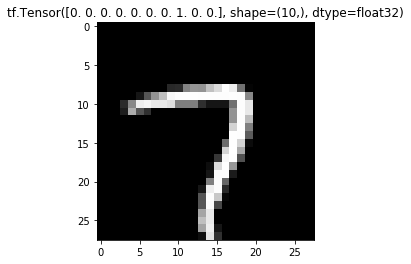

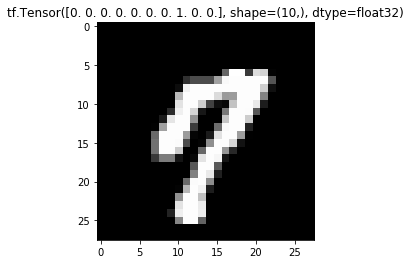

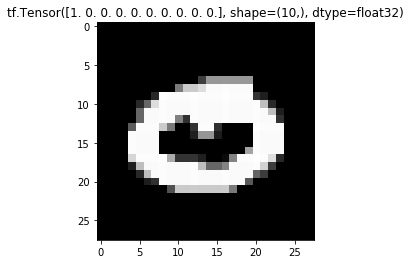

In [62]:
for image, label in train_ds.take(3):
    plt.title(str(label[0]))
    plt.imshow(image[0, :, :, 0], 'gray')
    plt.show()

In [63]:
image, label = next(iter(train_ds))

In [64]:
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32, 10]))

In [65]:
image.dtype

tf.float64

# Training

In [66]:
epochs = 1
batch_size = 32

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(
        template.format(epoch + 1, train_loss.result(),
                        train_accuracy.result() * 100, test_loss.result(),
                        test_accuracy.result() * 100))

    # Reset the metrics for the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.10282863676548004, Accuracy: 96.80667114257812, Test Loss: 0.043223291635513306, Test Accuracy: 98.58999633789062
